## **WATER POTABLE PREDICTION PROJECT**

### Dự đoán về phân tích và phân loại các loại nước uống được



In [69]:
# Library
import numpy as np            # Linear Algebra
import pandas as pd           # Data processing
import matplotlib.pyplot as plt      # Visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Import data
drive_link = 'https://drive.google.com/file/d/1pShSeMo0o4fGIY9wN0E0jF5u0rAi7-w7/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+drive_link.split('/')[-2]
water_df = pd.read_csv(path)

In [6]:
# Initial view
water_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

## Data Cleaning & Preprocessing

In [7]:
# Info
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# Check Duplications
duplicates = water_df.duplicated(subset=None, keep="first")
duplicates_count = duplicates.sum()
print(duplicates_count)

0


**No duplicates found**

In [8]:
# Count NULL values
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**There are so many NULL in columns: ph, Sulfate and Trihalomethanes**

## Data Imputation

In [10]:
x = water_df.drop(['Potability'], axis=1)
y = water_df['Potability']
x = x.values

In [11]:
x

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [13]:
# Using Iterative Imputer to fill in the missing data
from sklearn.experimental import enable_iterative_imputer
from sklearn .impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(x,y)
IterativeImputer(add_indicator=False, estimator=None, imputation_order='ascending',
                 initial_strategy='mean', max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001, verbose=0)

IterativeImputer(max_value=None, min_value=None, random_state=0)

In [15]:
# Transform x based on the Iterative Imputer
x = imp.transform(x)

In [16]:
x

array([[7.19086276e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [18]:
# Update the Dataframe based on the Imputed Data
x = pd.DataFrame(x)
y = pd.DataFrame(y)
water_df = pd.concat([x,y], axis=1)
water_df = water_df.rename({0:'ph',1:'Hardness',2:'Solids', 3:'Chloramines', 4:'Sulfate', 5:'Conductivity',
                            6:'Organic_carbon', 7:'Trihalomethanes', 8:'Turbidity'}, axis='columns')
water_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.190863  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  344.836463   
2     8.099124  224.236259  19909.541732     9.275884  331.981769   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  338.612062   
3273  9.419510  175.762646  33155.578218     7.350233  326.848982   
3274  5.126763  230.603758  11983.869376     6.303357  336.993878   
3275  7.874671  195.102299  17404.177061     7.509306  338.025733   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.474992   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [19]:
# Check the count of NULLs again
water_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Data Visualization

In [22]:
# Hisplot of features by col "Potability"
num = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

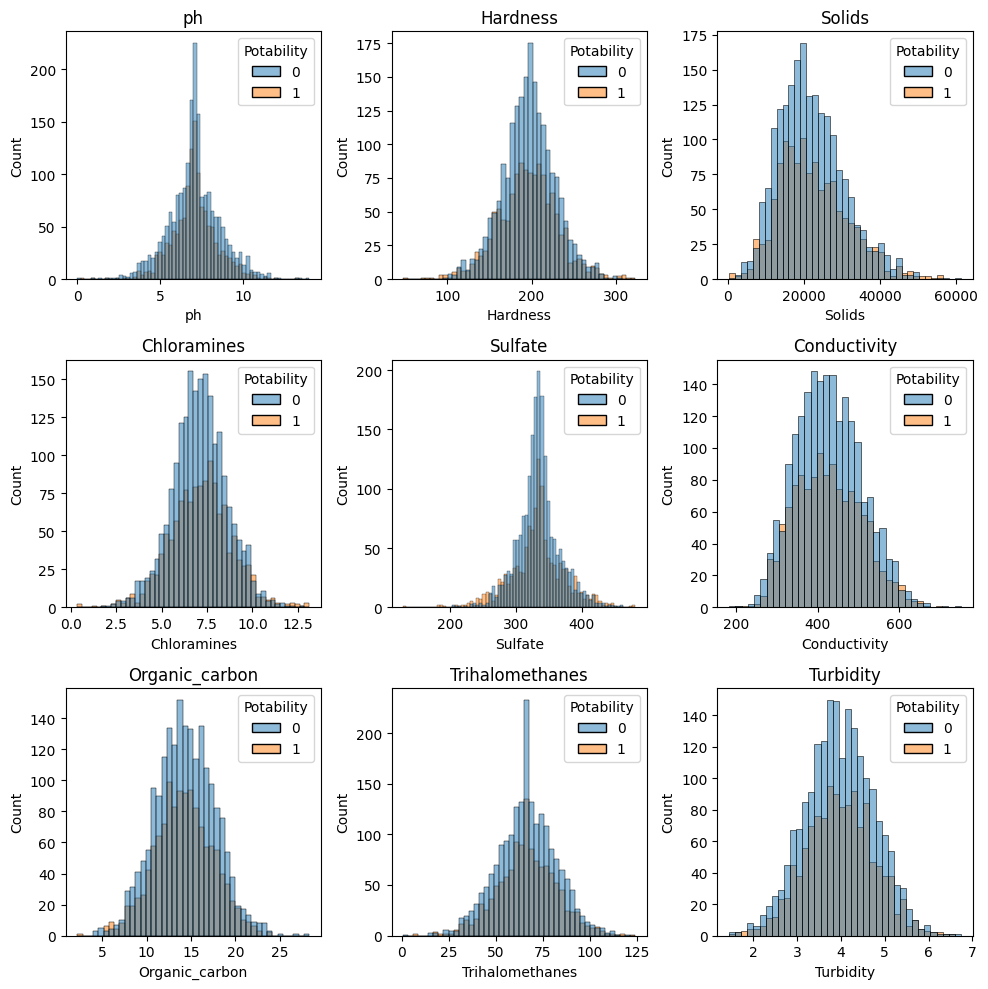

In [26]:
# Create figure
fig = plt.figure(figsize=(10,10))

for i in range(len(num)):
  plt.subplot(3,3,i+1)
  plt.title(num[i])
  sns.histplot(data=water_df, x=water_df[num[i]], hue='Potability')

plt.tight_layout()
plt.show()

**Both "Potability = 0" and "Potability = 1" are normal distributions in all the features**

In [28]:
# Check the mean of each feature by "Potability"
water_df.groupby('Potability').mean().T   # Use .T to rotate table

Potability                  0             1
ph                   7.085197      7.072237
Hardness           196.733292    195.800744
Solids           21777.490788  22383.991018
Chloramines          7.092175      7.169338
Sulfate            334.380671    332.853768
Conductivity       426.730454    425.383800
Organic_carbon      14.364335     14.160893
Trihalomethanes     66.308013     66.532042
Turbidity            3.965800      3.968328

**There are no significant difference of means between "Potability=0" and "Potability=1".**

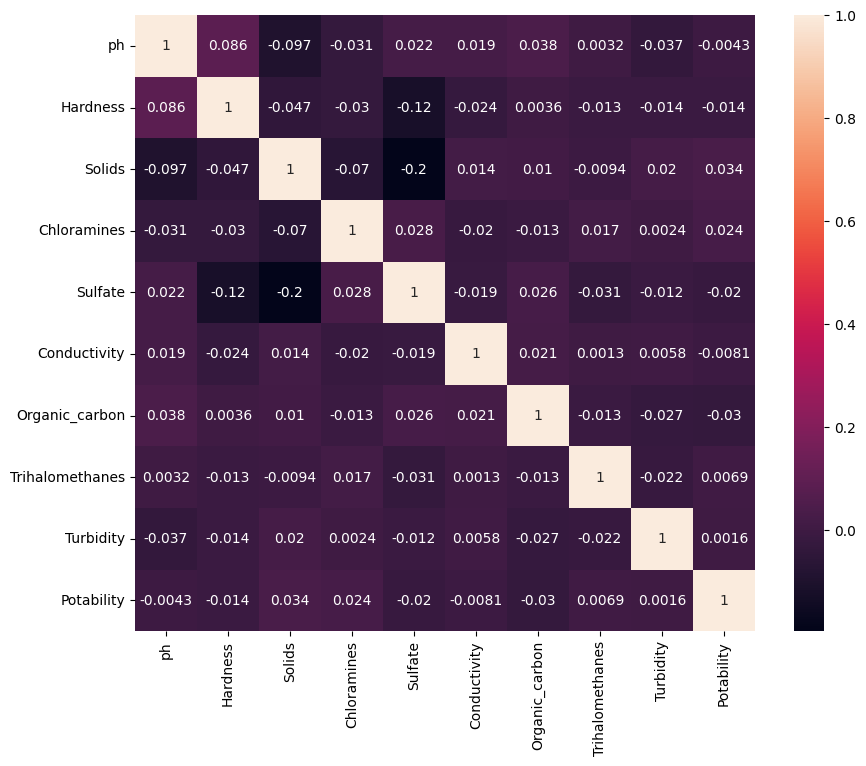

In [33]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(water_df.corr(), annot=True)
plt.show()

**Based on the Correlation Map, we can see that there are no direct & strong connection between "Potability" and any other columns**

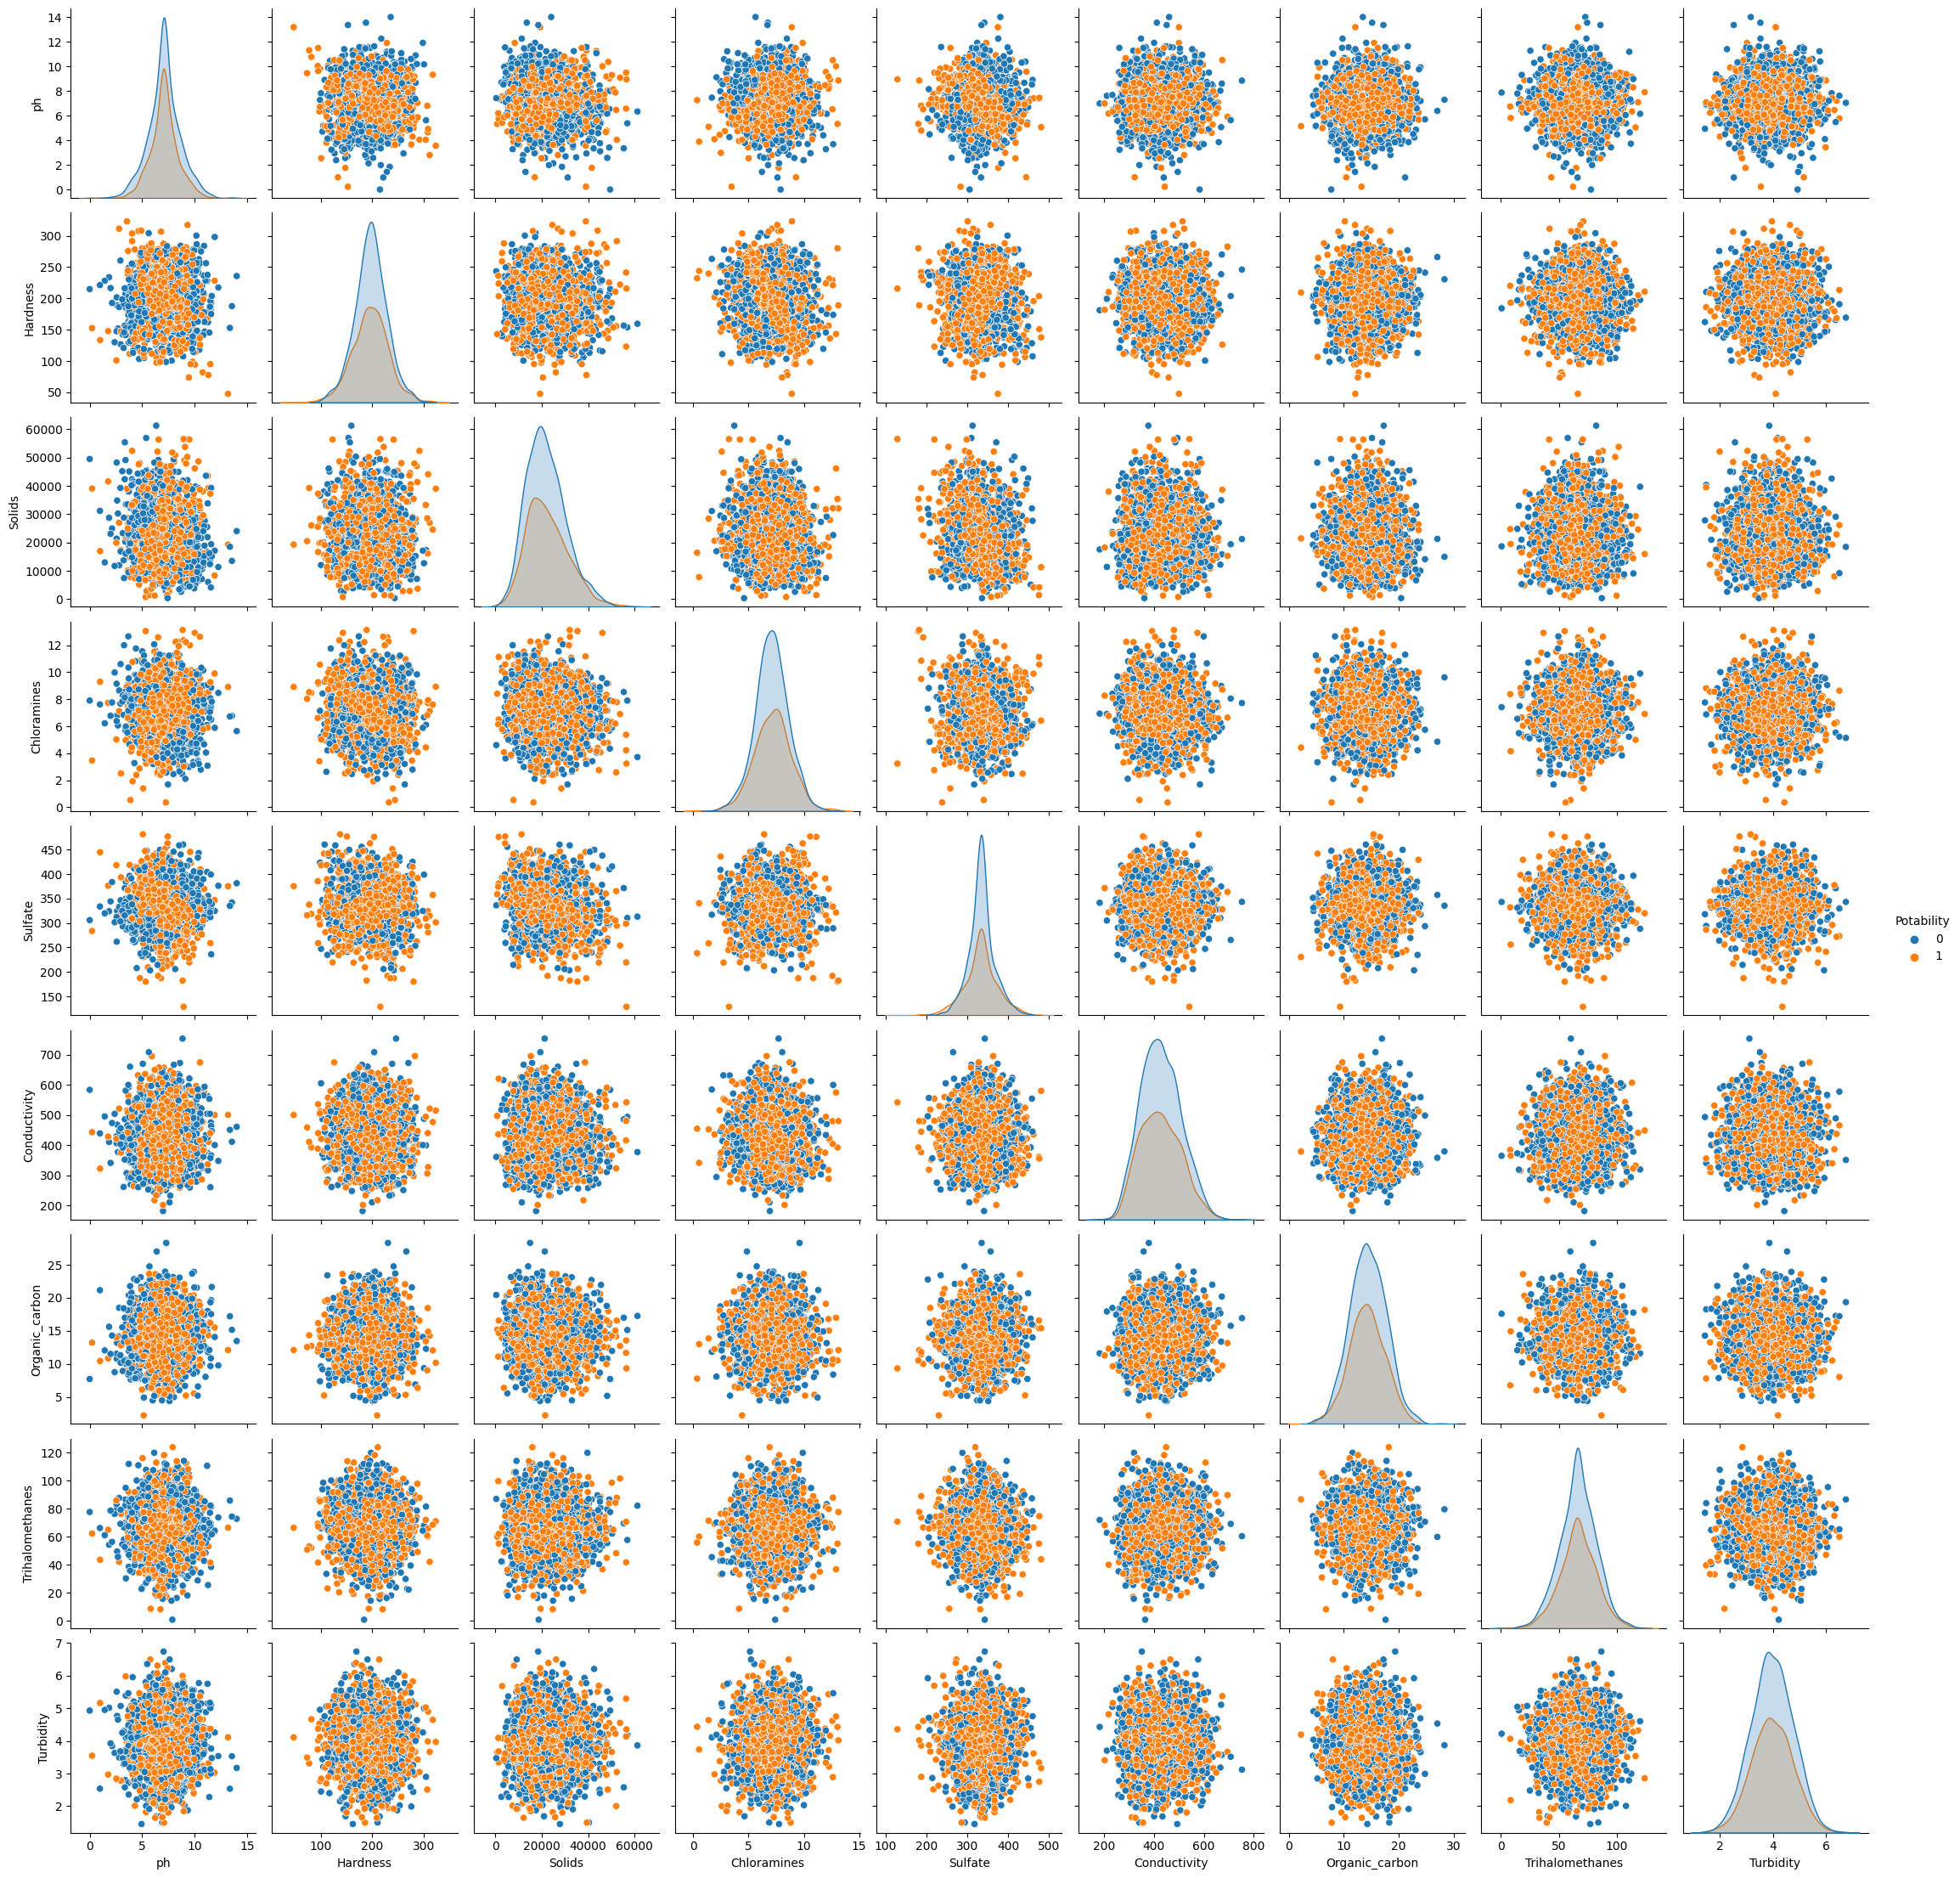

In [35]:
# PAIRPLOT by "Potability = 0" and "Potability = 1"
sns.pairplot(water_df, hue="Potability")

**There seem to be similar distributions between "Portability=0" and "Portability=1". So it may be very difficult to build high acurate model to classify.**

Now, I will bin each features to 3 categories, marked in numbers

## Binning

In [37]:
# Table view before BINNING
x = water_df.drop(['Potability'], axis=1)
y = water_df['Potability']
x

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.190863  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  344.836463   
2     8.099124  224.236259  19909.541732     9.275884  331.981769   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  338.612062   
3273  9.419510  175.762646  33155.578218     7.350233  326.848982   
3274  5.126763  230.603758  11983.869376     6.303357  336.993878   
3275  7.874671  195.102299  17404.177061     7.509306  338.025733   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.474992   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [39]:
# Cut into 3 equally devided bins
x['ph']=pd.cut(x['ph'], 3, labels=False)
x['Hardness']=pd.cut(x['Hardness'],3,labels=False)
x['Solids']=pd.cut(x['Solids'],3,labels=False)
x['Chloramines']=pd.cut(x['Chloramines'],3,labels=False)
x['Sulfate']=pd.cut(x['Sulfate'],3,labels=False)
x['Conductivity']=pd.cut(x['Conductivity'],3,labels=False)
x['Organic_carbon']=pd.cut(x['Organic_carbon'],3,labels=False)
x['Trihalomethanes']=pd.cut(x['Trihalomethanes'],3,labels=False)
x['Turbidity']=pd.cut(x['Turbidity'],3,labels=False)
x

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      1         1       1            1        2             2   
1      0         0       0            1        1             2   
2      1         1       0            2        1             1   
3      1         1       1            1        1             0   
4      1         1       0            1        1             1   
...   ..       ...     ...          ...      ...           ...   
3271   1         1       2            1        1             1   
3272   1         1       0            1        1             1   
3273   2         1       1            1        1             1   
3274   1         1       0            1        1             1   
3275   1         1       0            1        1             0   

      Organic_carbon  Trihalomethanes  Turbidity  
0                  0                2          0  
1                  1                1          1  
2                  1                1          0  
3                  1                2          1  
4                  1                0          1  
...              ...              ...        ...  
3271               1                1          1  
3272               2                1          0  
3273               1                1          1  
3274               1                1          1  
3275               1                1          0  

[3276 rows x 9 columns]

## Clustering

Use K-Mean Clustering

In [40]:
from sklearn.cluster import KMeans

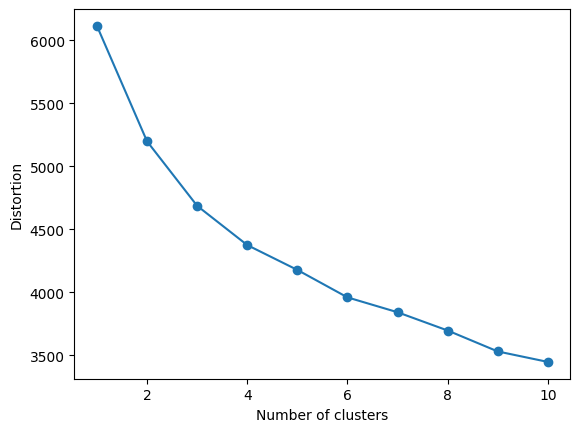

In [41]:
distortions = []

for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(x)
  distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Interpreting the Elbow Method Plot**: the chosen k value is 3

In [43]:
# Train model with K = 3
model_k = KMeans(n_clusters=3, random_state=1)
model_k.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [44]:
cluster = model_k.labels_
x['Cluster']=cluster
x

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      1         1       1            1        2             2   
1      0         0       0            1        1             2   
2      1         1       0            2        1             1   
3      1         1       1            1        1             0   
4      1         1       0            1        1             1   
...   ..       ...     ...          ...      ...           ...   
3271   1         1       2            1        1             1   
3272   1         1       0            1        1             1   
3273   2         1       1            1        1             1   
3274   1         1       0            1        1             1   
3275   1         1       0            1        1             0   

      Organic_carbon  Trihalomethanes  Turbidity  Cluster  
0                  0                2          0        0  
1                  1                1          1        0  
2                  1                1          0        0  
3                  1                2          1        1  
4                  1                0          1        0  
...              ...              ...        ...      ...  
3271               1                1          1        2  
3272               2                1          0        0  
3273               1                1          1        2  
3274               1                1          1        0  
3275               1                1          0        1  

[3276 rows x 10 columns]

In [46]:
x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Cluster'],
      dtype='object')

In [47]:
cate_indices = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Cluster']

In [90]:
# Split Train and Test set (30/70 propotion)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [91]:
# Check value ratio
water_df.groupby('Potability').count()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
Potability                                                               
0           1998      1998    1998         1998     1998          1998   
1           1278      1278    1278         1278     1278          1278   

            Organic_carbon  Trihalomethanes  Turbidity  
Potability                                              
0                     1998             1998       1998  
1                     1278             1278       1278

**The data is currently inbalanced to the Potability=0 side with the rate 1998/1278. So I used SMOTE balancing technique.**

## Data Balancing using SMOTE

In [93]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [94]:
oversample = SMOTE()
x_train_s, y_train_s = oversample.fit_resample(x_train, y_train)

In [95]:
counter = Counter(y_train)

In [96]:
# Check the ratio of each
Counter(y_train_s)

Counter({0: 1381, 1: 1381})

**Now that the data is balance, I moved on to the next step: Modelling**

## Modelling by Catboost

In [61]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [97]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [98]:
# Setup train pool and validation pool
train_pool = Pool(x_train_s, y_train_s, cat_features=cate_indices)
validate_pool = Pool(x_test, y_test, cat_features=cate_indices)

In [99]:
from catboost import CatBoostClassifier

In [100]:
params = {
    'depth' : 6,
    'learning_rate' : 0.16,
    'early_stopping_rounds' : 10,
    'iterations' : 200,
    'custom_loss' :['Accuracy'],
    'random_seed' :42
}
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

0:	learn: 0.6894111	test: 0.6904782	best: 0.6904782 (0)	total: 31.2ms	remaining: 6.2s
1:	learn: 0.6861863	test: 0.6884730	best: 0.6884730 (1)	total: 43.5ms	remaining: 4.31s
2:	learn: 0.6836741	test: 0.6873677	best: 0.6873677 (2)	total: 58.5ms	remaining: 3.84s
3:	learn: 0.6830021	test: 0.6866602	best: 0.6866602 (3)	total: 64.6ms	remaining: 3.16s
4:	learn: 0.6799312	test: 0.6848934	best: 0.6848934 (4)	total: 78.7ms	remaining: 3.07s
5:	learn: 0.6779059	test: 0.6838826	best: 0.6838826 (5)	total: 92.5ms	remaining: 2.99s
6:	learn: 0.6775750	test: 0.6832812	best: 0.6832812 (6)	total: 99.7ms	remaining: 2.75s
7:	learn: 0.6774089	test: 0.6834195	best: 0.6832812 (6)	total: 109ms	remaining: 2.62s
8:	learn: 0.6773054	test: 0.6832480	best: 0.6832480 (8)	total: 118ms	remaining: 2.49s
9:	learn: 0.6747213	test: 0.6825934	best: 0.6825934 (9)	total: 133ms	remaining: 2.53s
10:	learn: 0.6746657	test: 0.6826243	best: 0.6825934 (9)	total: 142ms	remaining: 2.45s
11:	learn: 0.6732233	test: 0.6829618	best: 0.68

In [101]:
# Prediction for y test
y_cat = model.predict(x_test)

<Axes: >

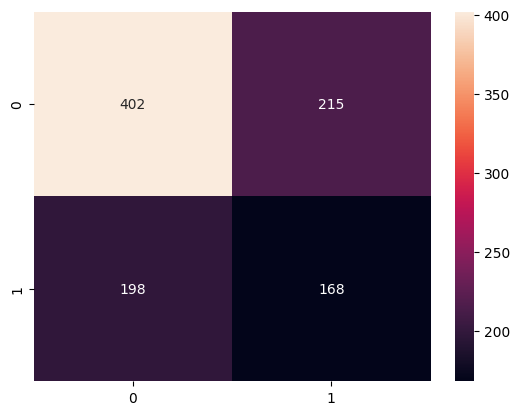

In [102]:
# Draw confusion matrix
cm = confusion_matrix(y_test, y_cat)
sns.heatmap(cm, annot=True, fmt='d')

In [71]:
# Classification report
report = classification_report(y_test, y_cat, output_dict=True)
report

{'0': {'precision': 0.6319018404907976,
  'recall': 0.3338735818476499,
  'f1-score': 0.4369034994697773,
  'support': 617},
 '1': {'precision': 0.3744292237442922,
  'recall': 0.6721311475409836,
  'f1-score': 0.4809384164222874,
  'support': 366},
 'accuracy': 0.4598168870803662,
 'macro avg': {'precision': 0.5031655321175449,
  'recall': 0.5030023646943167,
  'f1-score': 0.4589209579460324,
  'support': 983},
 'weighted avg': {'precision': 0.5360371632484568,
  'recall': 0.4598168870803662,
  'f1-score': 0.45329900262808726,
  'support': 983}}

In [72]:
# Get Precision, Recall, F1-Score, Accuracy and Support for the Classification Report
precision = report['0']['precision'], report['1']['precision']
recall = report['0']['recall'], report['1']['recall']
f1_score = report['0']['f1-score'], report['1']['f1-score']
accuracy = report['accuracy']

In [73]:
# Print every value
print("Precision for 'Potability=0':", precision[0])
print("Precision for 'Potability=1':", precision[1])
print()
print("Recall for 'Potability=0':", recall[0])
print("Recall for 'Potability=1':", recall[1])
print()
print("F1-score for 'Potability=0':", f1_score[0])
print("F1-score for 'Potability=1':", f1_score[1])
print()
print("Accuracy:", accuracy)

Precision for 'Potability=0': 0.6319018404907976
Precision for 'Potability=1': 0.3744292237442922

Recall for 'Potability=0': 0.3338735818476499
Recall for 'Potability=1': 0.6721311475409836

F1-score for 'Potability=0': 0.4369034994697773
F1-score for 'Potability=1': 0.4809384164222874

Accuracy: 0.4598168870803662


## Use Gaussian Naive Bayes Classifier to predict

In [75]:
# Import models
from sklearn.naive_bayes import GaussianNB

In [107]:
# Get variables
x = water_df.drop('Potability', axis=1)
y = water_df['Potability']
x = x.values

In [112]:
# Split Test/Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [113]:
# Train model
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# predict the y test set
y_GNB=GNB.predict(x_test)

In [114]:
# Classification Report
classification_GNB = classification_report(y_test, y_GNB, target_names=["Not Potable", "Potable"])
print(classification_GNB)

              precision    recall  f1-score   support

 Not Potable       0.63      0.87      0.73       590
     Potable       0.52      0.22      0.31       393

    accuracy                           0.61       983
   macro avg       0.57      0.54      0.52       983
weighted avg       0.58      0.61      0.56       983



<Axes: >

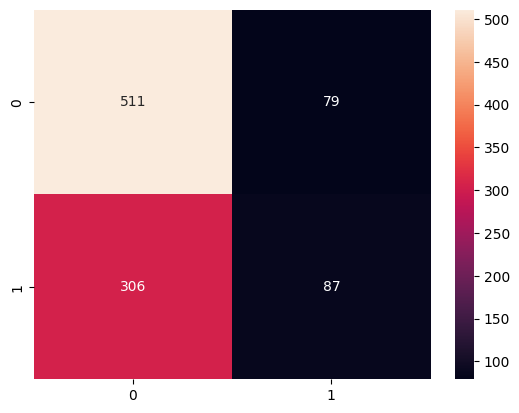

In [116]:
# Draw confusion matrix
cm = confusion_matrix(y_test, y_GNB)
sns.heatmap(cm, annot=True, fmt='d')

**The statistics of water are not really connected to each other, so the algorithms might not work well to produce the high possibility**

*The End*